In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [169]:
ut = pd.read_csv('YOUTUBE CHANNELS DATASET.csv')
ut.head()

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1,MrBeast,336M,838,"66,85,36,33,536",US
1,2,T-Series,281M,"22,313","2,77,24,27,95,553",IN
2,3,Cocomelon-Nursery Rhymes,186M,1370,"1,94,36,17,52,276",US
3,4,Youtube Movies,185M,0,0,NaN
4,5,Set India,180M,"1,48,727","1,72,70,90,29,653",IN


In [171]:
ut.shape

(100, 6)

In [173]:
ut.isna().sum()

Ranking        0
Username       0
Subscribers    0
Uploads        0
Views          0
Country        6
dtype: int64

In [175]:
ut[ut['Country'].isna()]

,Ranking,Username,Subscribers,Uploads,Views,Country
3,4,Youtube Movies,185M,0,0,NaN
8,9,Music,121M,0,0,NaN
11,12,WWE,106M,"80,964","90,16,71,79,784",NaN
17,18,Gaming,92.9M,0,0,NaN
24,25,Sports,74.7M,0,0,NaN
40,41,EminemMusic,63.4M,196,"32,25,62,97,282",NaN


In [177]:
ut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ranking      100 non-null    int64 
 1   Username     100 non-null    object
 2   Subscribers  100 non-null    object
 3   Uploads      100 non-null    object
 4   Views        100 non-null    object
 5   Country      94 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [179]:
ut.describe(include='all')

,Ranking,Username,Subscribers,Uploads,Views,Country
count,100.000000,100,100,100,100,94
unique,NaN,100,83,97,97,23
top,NaN,MrBeast,62.9M,0,0,IN
freq,NaN,1,4,4,4,28
mean,50.500000,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN


In [181]:
ut.Country.value_counts()

Country
IN    28
US    27
BR     5
KR     4
MX     4
AE     3
JP     2
SV     2
AR     2
PK     2
RU     2
ID     2
PH     1
CO     1
PR     1
TR     1
IT     1
CL     1
ES     1
GB     1
PT     1
CA     1
NO     1
Name: count, dtype: int64

In [182]:
ut.Country.fillna('IN', inplace = True)

In [191]:
non_zero_avg = ut[ut['Uploads'] != 0]['Uploads'].mean()
ut['Uploads'] = ut['Uploads'].replace(0, non_zero_avg)

In [193]:
ut.describe(include='all')

,Ranking,Username,Subscribers,Uploads,Views,Country
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,50.500000,49.500000,39.440000,48.500000,46.56000,12.800000
std,29.011492,29.011492,22.883243,27.288211,28.91168,6.981939
min,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,25.750000,24.750000,21.000000,25.750000,21.75000,9.000000
50%,50.500000,49.500000,37.500000,48.500000,46.50000,9.000000
75%,75.250000,74.250000,57.250000,71.250000,71.25000,22.000000
max,100.000000,99.000000,82.000000,96.000000,96.00000,22.000000


In [187]:
encode = LabelEncoder()
ut.Username = encode.fit_transform(ut.Username)
ut['Subscribers'] = encode.fit_transform(ut['Subscribers'])
ut.Uploads = encode.fit_transform(ut.Uploads)
ut.Views = encode.fit_transform(ut.Views)
ut.Country = encode.fit_transform(ut['Country'])

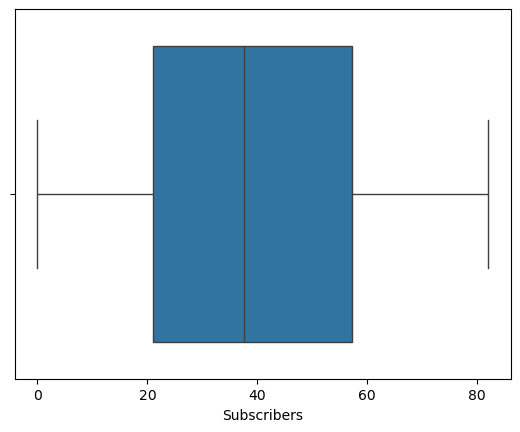

In [195]:
sns.boxplot(x='Subscribers', data=ut)
plt.show()

In [197]:
ave_views = ut.groupby('Country')['Views'].mean()
ave_views

Country
0     43.000000
1     51.500000
2     49.400000
3     52.000000
4     10.000000
5     47.000000
6     17.000000
7     51.000000
8     85.000000
9     44.705882
10    29.000000
11    45.500000
12    56.000000
13    32.750000
14     8.000000
15    76.000000
16    80.500000
17    59.000000
18    87.000000
19    60.500000
20    35.500000
21    35.000000
22    45.074074
Name: Views, dtype: float64

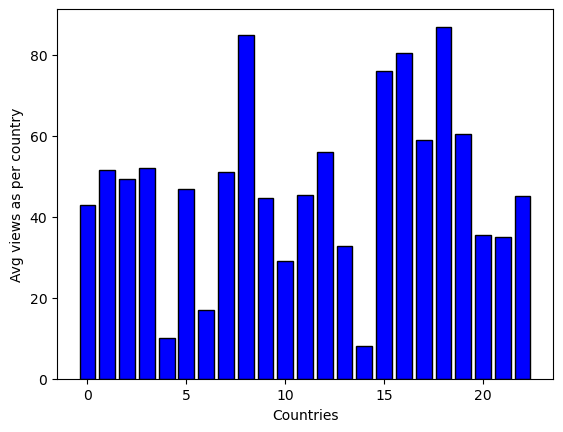

In [199]:
plt.bar(ave_views.index, ave_views.values, color = 'blue', edgecolor='black')
plt.xlabel('Countries')
plt.ylabel('Avg views as per country')
plt.show()

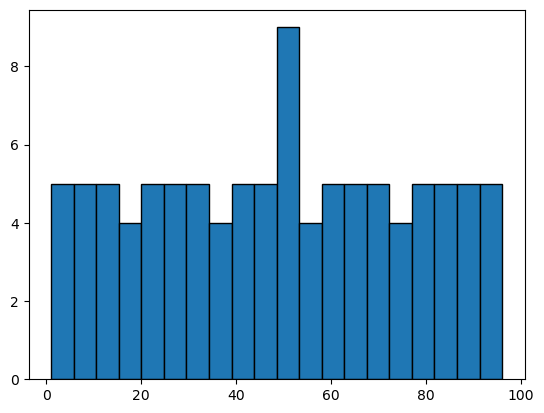

In [201]:
plt.hist(ut.Uploads, edgecolor='black', bins= 20)
plt.show()

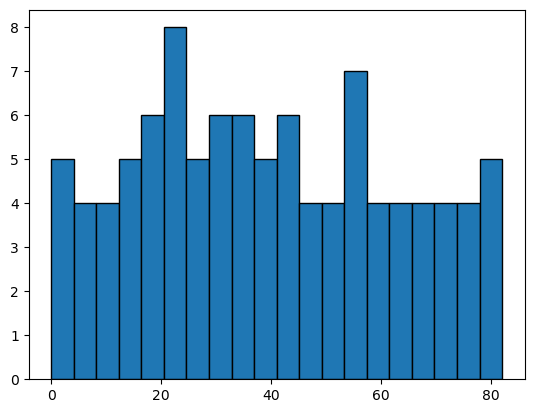

In [203]:
plt.hist(ut.Subscribers, edgecolor='black', bins=20)
plt.show()

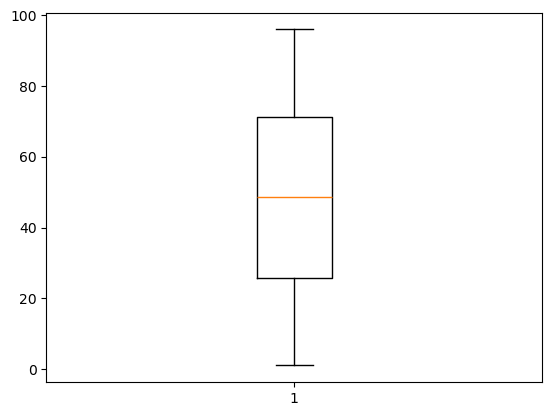

In [205]:
plt.boxplot(ut.Uploads)
plt.show()

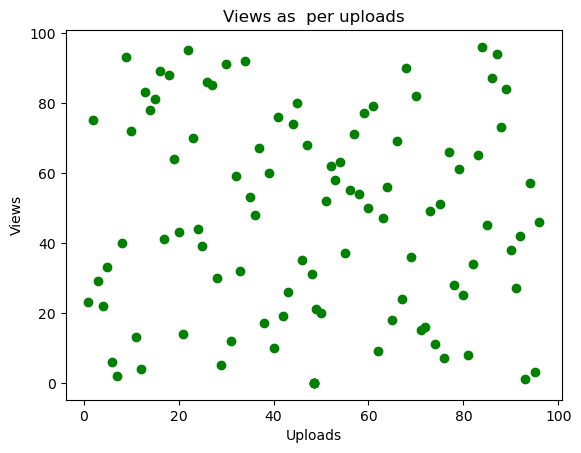

In [207]:
plt.scatter(ut.Uploads, ut.Views, color='Green')
plt.xlabel('Uploads')
plt.ylabel('Views')
plt.title('Views as  per uploads')
plt.show()

In [209]:
#Splitting into input and output
X = ut.iloc[:,:-1]
y = ut.iloc[:,-1]

In [211]:
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y, test_size=0.2)

In [213]:
# Grid search : Tries every combinations
max_dep = [2,3,4,5,6,7,8,9,10]
max_feat = [0.2,0.5,1.0]
param_combn = {'max_depth':max_dep, 'max_features': max_feat}

In [215]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [217]:
model = DecisionTreeClassifier()
cls = GridSearchCV(estimator=model, param_grid=param_combn, cv=5, verbose=2, n_jobs=-1)

In [219]:
cls.fit(X_tr,y_tr)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [0.2, 0.5, 1.0]},
             verbose=2)

In [220]:
cls.best_params_

{'max_depth': 2, 'max_features': 0.5}

In [231]:
model = DecisionTreeClassifier(max_depth=3, max_features=0.5)
model.fit(X_tr,y_tr)
y_pr = model.predict(X_ts)
accuracy_score(y_ts,y_pr)*100

20.0

In [235]:
model = RandomForestClassifier(max_depth=2, max_features=0.5, random_state=42)
model.fit(X_tr,y_tr)
y_pr = model.predict(X_ts)
accuracy_score(y_ts,y_pr)*100

25.0

In [237]:
# Randomized hyperparameter tuning : Creates few combinations of hyperparameters
model = DecisionTreeClassifier()
cls = RandomizedSearchCV(estimator=model, param_distributions=param_combn, cv=5, verbose=2, n_jobs=-1)

In [239]:
cls.fit(X_tr,y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': [0.2, 0.5, 1.0]},
                   verbose=2)

In [241]:
cls.best_params_

{'max_features': 1.0, 'max_depth': 6}

In [255]:
model = DecisionTreeClassifier(max_depth=6, max_features=1.0)
model.fit(X_tr,y_tr)
y_pr = model.predict(X_ts)
accuracy_score(y_ts,y_pr)*100

25.0

In [259]:
model = RandomForestClassifier(max_depth=6, max_features=1.0)
model.fit(X_tr,y_tr)
y_pr = model.predict(X_ts)
accuracy_score(y_ts,y_pr)*100

20.0

In [261]:
model = LogisticRegression()
model.fit(X_tr,y_tr)
y_pr = model.predict(X_ts)

In [263]:
accuracy_score(y_pr,y_ts)*100

20.0

In [265]:
from sklearn.svm import SVC

In [267]:
model = SVC()
model.fit(X_tr,y_tr)
y_pr = model.predict(X_ts)
accuracy_score(y_ts,y_pr)*100

15.0

In [269]:
k_folds = KFold(n_splits=5, shuffle=True)

model = SVC()

In [272]:
preds = cross_val_score(model,X,y,cv=k_folds)

In [274]:
preds

array([0.35, 0.15, 0.1 , 0.2 , 0.4 ])

In [276]:
preds.mean()

0.24000000000000005